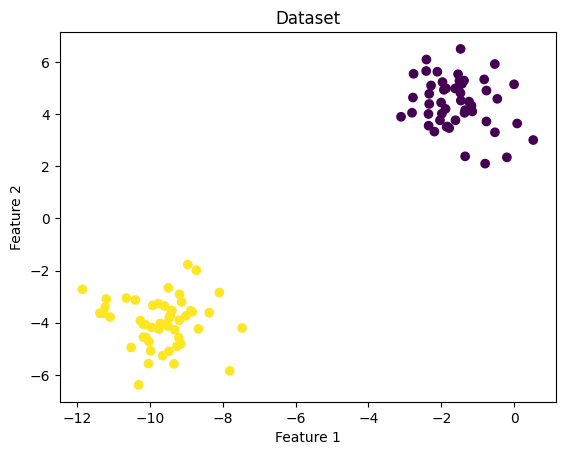

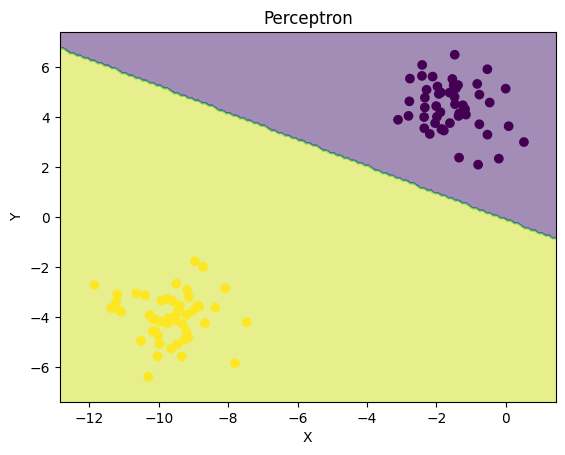

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def perceptron_train(X, y, learning_rate=0.01, max_epochs=100):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    weights = np.zeros(X.shape[1])

    for _ in range(max_epochs):
        for i in range(X.shape[0]):
            activation = np.dot(X[i], weights)
            prediction = 1 if activation >= 0 else 0
            error = y[i] - prediction
            weights += learning_rate * error * X[i]

    return weights

def perceptron_predict(X, weights):
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    predictions = np.dot(X, weights)
    return np.where(predictions >= 0, 1, 0)

X, y = make_blobs(centers=2, cluster_std=1, random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset")
plt.show()

weights = perceptron_train(X, y)

predictions = perceptron_predict(X, weights)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = perceptron_predict(np.c_[xx.ravel(), yy.ravel()], weights)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Perceptron")
plt.show()
